In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.cluster.hierarchy import dendrogram, linkage

#### Data loading

In [2]:
data = pd.read_csv("C:/Users/pjlu_/Desktop/DataminingUPB.csv", sep=";")
data.rename(columns={'Humedad en aire':'hum_aire',
                          'Humedad en suelo 1':'hum_gnd_1',
                          'Humedad en suelo 2':'hum_gnd_2',
                          'Unnamed: 2':'unidad',
                    'Unnamed: 4':'unidad_3',
                    'Unnamed: 6':'unidad_5',
                    'Unnamed: 8':'unidad_7',
                    'Unnamed: 10':'unidad_9',
                    'Unnamed: 12':'unidad_11'},
                 inplace=True)

In [3]:
data.head()

,Time,Temperatura,unidad,CO2,unidad_3,hum_aire,unidad_5,hum_gnd_1,unidad_7,hum_gnd_2,unidad_9,Luminosidad,unidad_11,EstadosPlanta_1,EstadosPlanta_2,N_hojas_1,N_hojas_2
0,2020.01.01 00:00:00,2599,Celcius,6315,ppm,704,%,50709.0,%,50710.0,%,16389,lumens,1.0,1.0,72.0,97.0
1,2020.01.01 00:10:00,2598,Celcius,6388,ppm,700,%,50709.0,%,50710.0,%,16390,lumens,1.0,1.0,72.0,97.0
2,2020.01.01 00:20:00,2598,Celcius,6517,ppm,698,%,50710.0,%,50710.0,%,16390,lumens,1.0,1.0,72.0,97.0
3,2020.01.01 00:30:00,2591,Celcius,6493,ppm,694,%,50710.0,%,50710.0,%,16397,lumens,1.0,1.0,72.0,97.0
4,2020.01.01 00:40:00,2590,Celcius,6315,ppm,693,%,50709.0,%,50710.0,%,16398,lumens,1.0,1.0,72.0,97.0


In [4]:
data.shape

(10656, 17)

### Data exploration

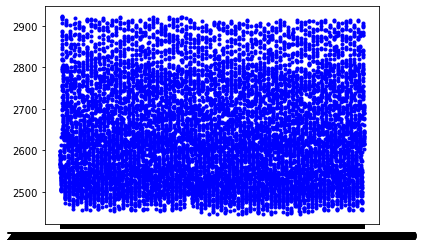

In [5]:
b= data.Temperatura
y=data.Time
a= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
b=data.Temperatura
plot(y,b,'b.')
show()

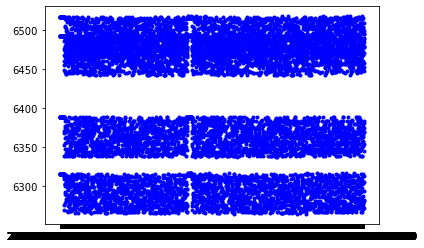

In [6]:
c= data.CO2

plot(y,c,'b.')
show()

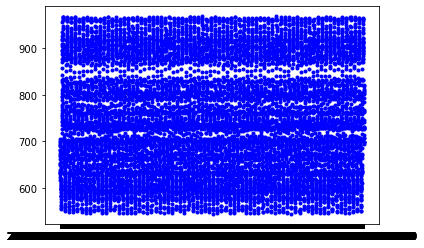

In [7]:
humedad_a= data.hum_aire
plot(y,humedad_a,'b.')
show()

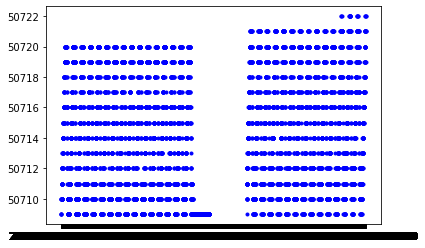

In [8]:
humedad_gnd1= data.hum_gnd_1
plot(y,humedad_gnd1,'b.')
show()

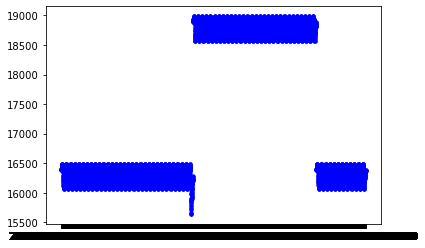

In [9]:
luminosidad= data.Luminosidad
plot(y,luminosidad,'b.')
show()

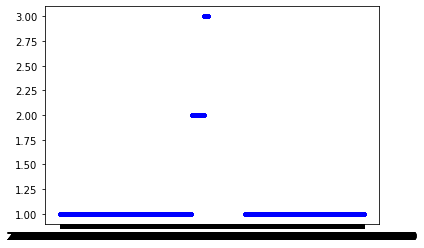

In [10]:
estados1= data.EstadosPlanta_1
plot(y,estados1,'b.')
show()

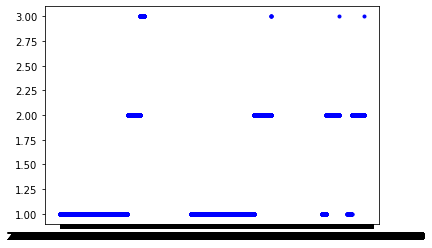

In [11]:
estados2= data.EstadosPlanta_2
plot(y,estados2,'b.')
show()

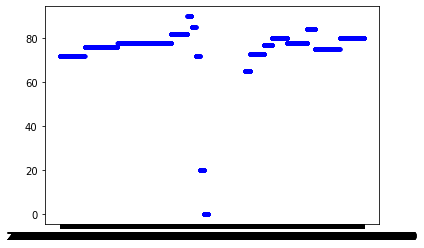

In [12]:
nhojas1= data.N_hojas_1
plot(y,nhojas1,'b.')
show()

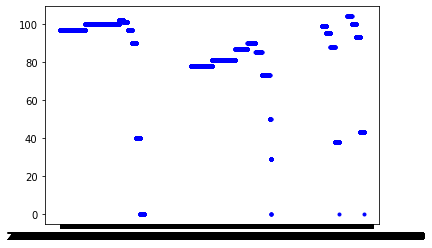

In [13]:
nhojas2= data.N_hojas_2
plot(y,nhojas2,'b.')
show()

#### Data Cleaning

In [14]:
#Eliminado de las columnas donde se ubican las unidades
data = data.drop(["unidad","unidad_3","unidad_5","unidad_7","unidad_9","unidad_11"],axis =1)
data.head()

,Time,Temperatura,CO2,hum_aire,hum_gnd_1,hum_gnd_2,Luminosidad,EstadosPlanta_1,EstadosPlanta_2,N_hojas_1,N_hojas_2
0,2020.01.01 00:00:00,2599,6315,704,50709.0,50710.0,16389,1.0,1.0,72.0,97.0
1,2020.01.01 00:10:00,2598,6388,700,50709.0,50710.0,16390,1.0,1.0,72.0,97.0
2,2020.01.01 00:20:00,2598,6517,698,50710.0,50710.0,16390,1.0,1.0,72.0,97.0
3,2020.01.01 00:30:00,2591,6493,694,50710.0,50710.0,16397,1.0,1.0,72.0,97.0
4,2020.01.01 00:40:00,2590,6315,693,50709.0,50710.0,16398,1.0,1.0,72.0,97.0


In [15]:
#Guardado de las variables correspondientes al sujeto de prueba 1
data2 = data.drop(["EstadosPlanta_2","N_hojas_2","hum_gnd_2",],axis =1)
data2.head()

,Time,Temperatura,CO2,hum_aire,hum_gnd_1,Luminosidad,EstadosPlanta_1,N_hojas_1
0,2020.01.01 00:00:00,2599,6315,704,50709.0,16389,1.0,72.0
1,2020.01.01 00:10:00,2598,6388,700,50709.0,16390,1.0,72.0
2,2020.01.01 00:20:00,2598,6517,698,50710.0,16390,1.0,72.0
3,2020.01.01 00:30:00,2591,6493,694,50710.0,16397,1.0,72.0
4,2020.01.01 00:40:00,2590,6315,693,50709.0,16398,1.0,72.0


In [16]:
#Guardado de las variables correspondientes al sujeto de prueba 2
data3 = data.drop(["EstadosPlanta_1","N_hojas_1","hum_gnd_1"],axis =1)
data3.head()

,Time,Temperatura,CO2,hum_aire,hum_gnd_2,Luminosidad,EstadosPlanta_2,N_hojas_2
0,2020.01.01 00:00:00,2599,6315,704,50710.0,16389,1.0,97.0
1,2020.01.01 00:10:00,2598,6388,700,50710.0,16390,1.0,97.0
2,2020.01.01 00:20:00,2598,6517,698,50710.0,16390,1.0,97.0
3,2020.01.01 00:30:00,2591,6493,694,50710.0,16397,1.0,97.0
4,2020.01.01 00:40:00,2590,6315,693,50710.0,16398,1.0,97.0


In [17]:
#Estandarizado del encabezado de las columnas dhum_gnd, stadosPlanta y N_hojas para datos de sujeto 1
data2.rename(columns={'hum_gnd_1':'hum_gnd','EstadosPlanta_1':'EstadosPlanta','N_hojas_1':'N_hojas'},inplace=True)
data2['sujeto']= "1"
data2.head()

,Time,Temperatura,CO2,hum_aire,hum_gnd,Luminosidad,EstadosPlanta,N_hojas,sujeto
0,2020.01.01 00:00:00,2599,6315,704,50709.0,16389,1.0,72.0,1
1,2020.01.01 00:10:00,2598,6388,700,50709.0,16390,1.0,72.0,1
2,2020.01.01 00:20:00,2598,6517,698,50710.0,16390,1.0,72.0,1
3,2020.01.01 00:30:00,2591,6493,694,50710.0,16397,1.0,72.0,1
4,2020.01.01 00:40:00,2590,6315,693,50709.0,16398,1.0,72.0,1


In [18]:
#Estandarizado del encabezado de las columnas dhum_gnd, stadosPlanta y N_hojas para datos de sujeto 2
data3.rename(columns = {'hum_gnd_2':'hum_gnd','EstadosPlanta_2':'EstadosPlanta','N_hojas_2':'N_hojas'},inplace=True)
data3['sujeto'] = "2"
data3.head()

,Time,Temperatura,CO2,hum_aire,hum_gnd,Luminosidad,EstadosPlanta,N_hojas,sujeto
0,2020.01.01 00:00:00,2599,6315,704,50710.0,16389,1.0,97.0,2
1,2020.01.01 00:10:00,2598,6388,700,50710.0,16390,1.0,97.0,2
2,2020.01.01 00:20:00,2598,6517,698,50710.0,16390,1.0,97.0,2
3,2020.01.01 00:30:00,2591,6493,694,50710.0,16397,1.0,97.0,2
4,2020.01.01 00:40:00,2590,6315,693,50710.0,16398,1.0,97.0,2


In [19]:
#Concatenado de las tablas con los datos de sujeto 1 y los datos de sujeto 2
data4 = pd.concat([data2,data3])

In [20]:
data4.head()

,Time,Temperatura,CO2,hum_aire,hum_gnd,Luminosidad,EstadosPlanta,N_hojas,sujeto
0,2020.01.01 00:00:00,2599,6315,704,50709.0,16389,1.0,72.0,1
1,2020.01.01 00:10:00,2598,6388,700,50709.0,16390,1.0,72.0,1
2,2020.01.01 00:20:00,2598,6517,698,50710.0,16390,1.0,72.0,1
3,2020.01.01 00:30:00,2591,6493,694,50710.0,16397,1.0,72.0,1
4,2020.01.01 00:40:00,2590,6315,693,50709.0,16398,1.0,72.0,1


In [21]:
data4.tail()

,Time,Temperatura,CO2,hum_aire,hum_gnd,Luminosidad,EstadosPlanta,N_hojas,sujeto
10651,2020.05.25 23:10:00,2618,6495,699,50720.0,16364,NaN,NaN,2
10652,2020.05.25 23:20:00,2615,6280,707,50721.0,16376,NaN,NaN,2
10653,2020.05.25 23:30:00,2641,6354,699,50722.0,16382,NaN,NaN,2
10654,2020.05.25 23:40:00,2635,6485,694,50721.0,16386,NaN,NaN,2
10655,2020.05.25 23:50:00,2604,6458,699,50722.0,16388,NaN,NaN,2


In [22]:
data4.shape

(21312, 9)

In [23]:
##Eliminado filas  donde falte algùn dato
data4 = data4.dropna(axis=0, how="any") 

In [24]:
data4.shape

(16133, 9)

In [25]:
#Eliminado de la columna fecha
data_nfecha = data4.drop(["Time"],axis = 1)
data_nfecha.tail()

,Temperatura,CO2,hum_aire,hum_gnd,Luminosidad,EstadosPlanta,N_hojas,sujeto
10364,2569,6272,703,50721.0,16377,2.0,43.0,2
10365,2576,6388,700,50719.0,16382,2.0,43.0,2
10366,2576,6489,696,50721.0,16386,2.0,43.0,2
10367,2574,6462,700,50720.0,16385,2.0,43.0,2
10368,2553,6284,697,50719.0,16391,3.0,0.0,2


## Construcción de árbol de decisión inicial.

(array([13518.,     0.,     0.,     0.,     0.,  2321.,     0.,     0.,
            0.,   294.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

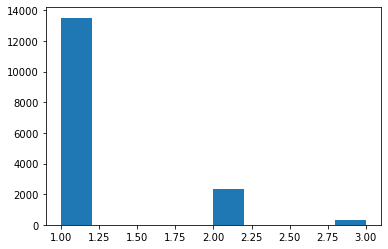

In [26]:
 plt.hist(data_nfecha.EstadosPlanta)

In [27]:
#Separación de variables predictoras y variables de salida
colnames = data_nfecha.columns.values.tolist()
predictores = colnames
target = colnames[5]
predictores.remove('EstadosPlanta')
predictores

['Temperatura',
 'CO2',
 'hum_aire',
 'hum_gnd',
 'Luminosidad',
 'N_hojas',
 'sujeto']

#### Distribución de datos entre datos de entrenamiento y datos de test

In [28]:
#Creación de una columna llamada training, donde el 75% de los datos son 1 y el 25% son 0
data_nfecha["Training"] = np.random.uniform(0,1, len(data_nfecha))<=0.75

In [29]:
#División de los datos en train y test, a partir de la columna Training
train, test = data_nfecha[data_nfecha["Training"]==True], data_nfecha[data_nfecha["Training"]==False]

(array([10231.,     0.,     0.,     0.,     0.,  1742.,     0.,     0.,
            0.,   217.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

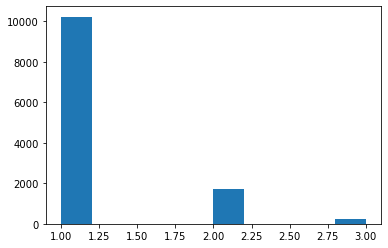

In [30]:
plt.hist(train.EstadosPlanta)

(array([3287.,    0.,    0.,    0.,    0.,  579.,    0.,    0.,    0.,
          77.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

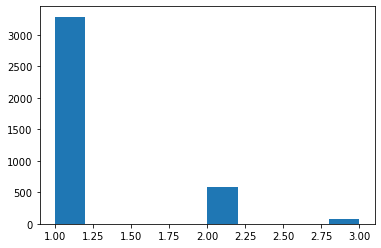

In [31]:
plt.hist(test.EstadosPlanta)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
#Definición y entrenamiento del árbol de decisión inicial
arbol = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
arbol.fit(train[predictores],train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [34]:
#Prueba del árbol con los datos de test
prediccion = arbol.predict(test[predictores])

In [35]:
#Matriz de confusión de los resultados obtenidos del árbol de decisión inicial
pd.crosstab(test[target],prediccion, rownames=["Real"],colnames=["Predicciones"])

Predicciones,1.0,2.0,3.0
Real,,,
1.0,3268,19,0
2.0,40,539,0
3.0,0,0,77


#### Visualización del árbol

In [36]:
from sklearn.tree import export_graphviz
import os
from graphviz import Source
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/release/bin' #Esta línea es necesaria para que graphviz funcione en windows

In [37]:
## Comando y direcciòn del archivo dot donde se va a guardar  la visualizaciòn del árbol de decisión
with open ("C:/Users/pjlu_/My Documents/EjerciciosMachineLearning/Tesis/tesis_data_mining.dot","w") as dotfile: 
    export_graphviz(arbol, out_file=dotfile, feature_names=predictores)                  
    dotfile.close()                                                                                    
                                                                                        

In [38]:
archivo = open("C:/Users/pjlu_/My Documents/EjerciciosMachineLearning/Tesis/tesis_data_mining.dot","r")
texto_archivo = archivo.read()
texto_archivo

'digraph Tree {\nnode [shape=box] ;\n0 [label="N_hojas <= 57.5\\nentropy = 0.717\\nsamples = 12190\\nvalue = [10231, 1742, 217]"] ;\n1 [label="N_hojas <= 10.0\\nentropy = 0.893\\nsamples = 701\\nvalue = [0, 484, 217]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 217\\nvalue = [0, 0, 217]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.0\\nsamples = 484\\nvalue = [0, 484, 0]"] ;\n1 -> 3 ;\n4 [label="hum_gnd <= 50709.5\\nentropy = 0.498\\nsamples = 11489\\nvalue = [10231, 1258, 0]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="N_hojas <= 84.5\\nentropy = 0.977\\nsamples = 2063\\nvalue = [1215, 848, 0]"] ;\n4 -> 5 ;\n6 [label="N_hojas <= 74.0\\nentropy = 0.803\\nsamples = 1285\\nvalue = [970, 315, 0]"] ;\n5 -> 6 ;\n7 [label="Luminosidad <= 17482.0\\nentropy = 0.735\\nsamples = 397\\nvalue = [82, 315, 0]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 60\\nvalue = [60, 0, 0]"] ;\n7 -> 8 ;\n9 [label="sujeto <

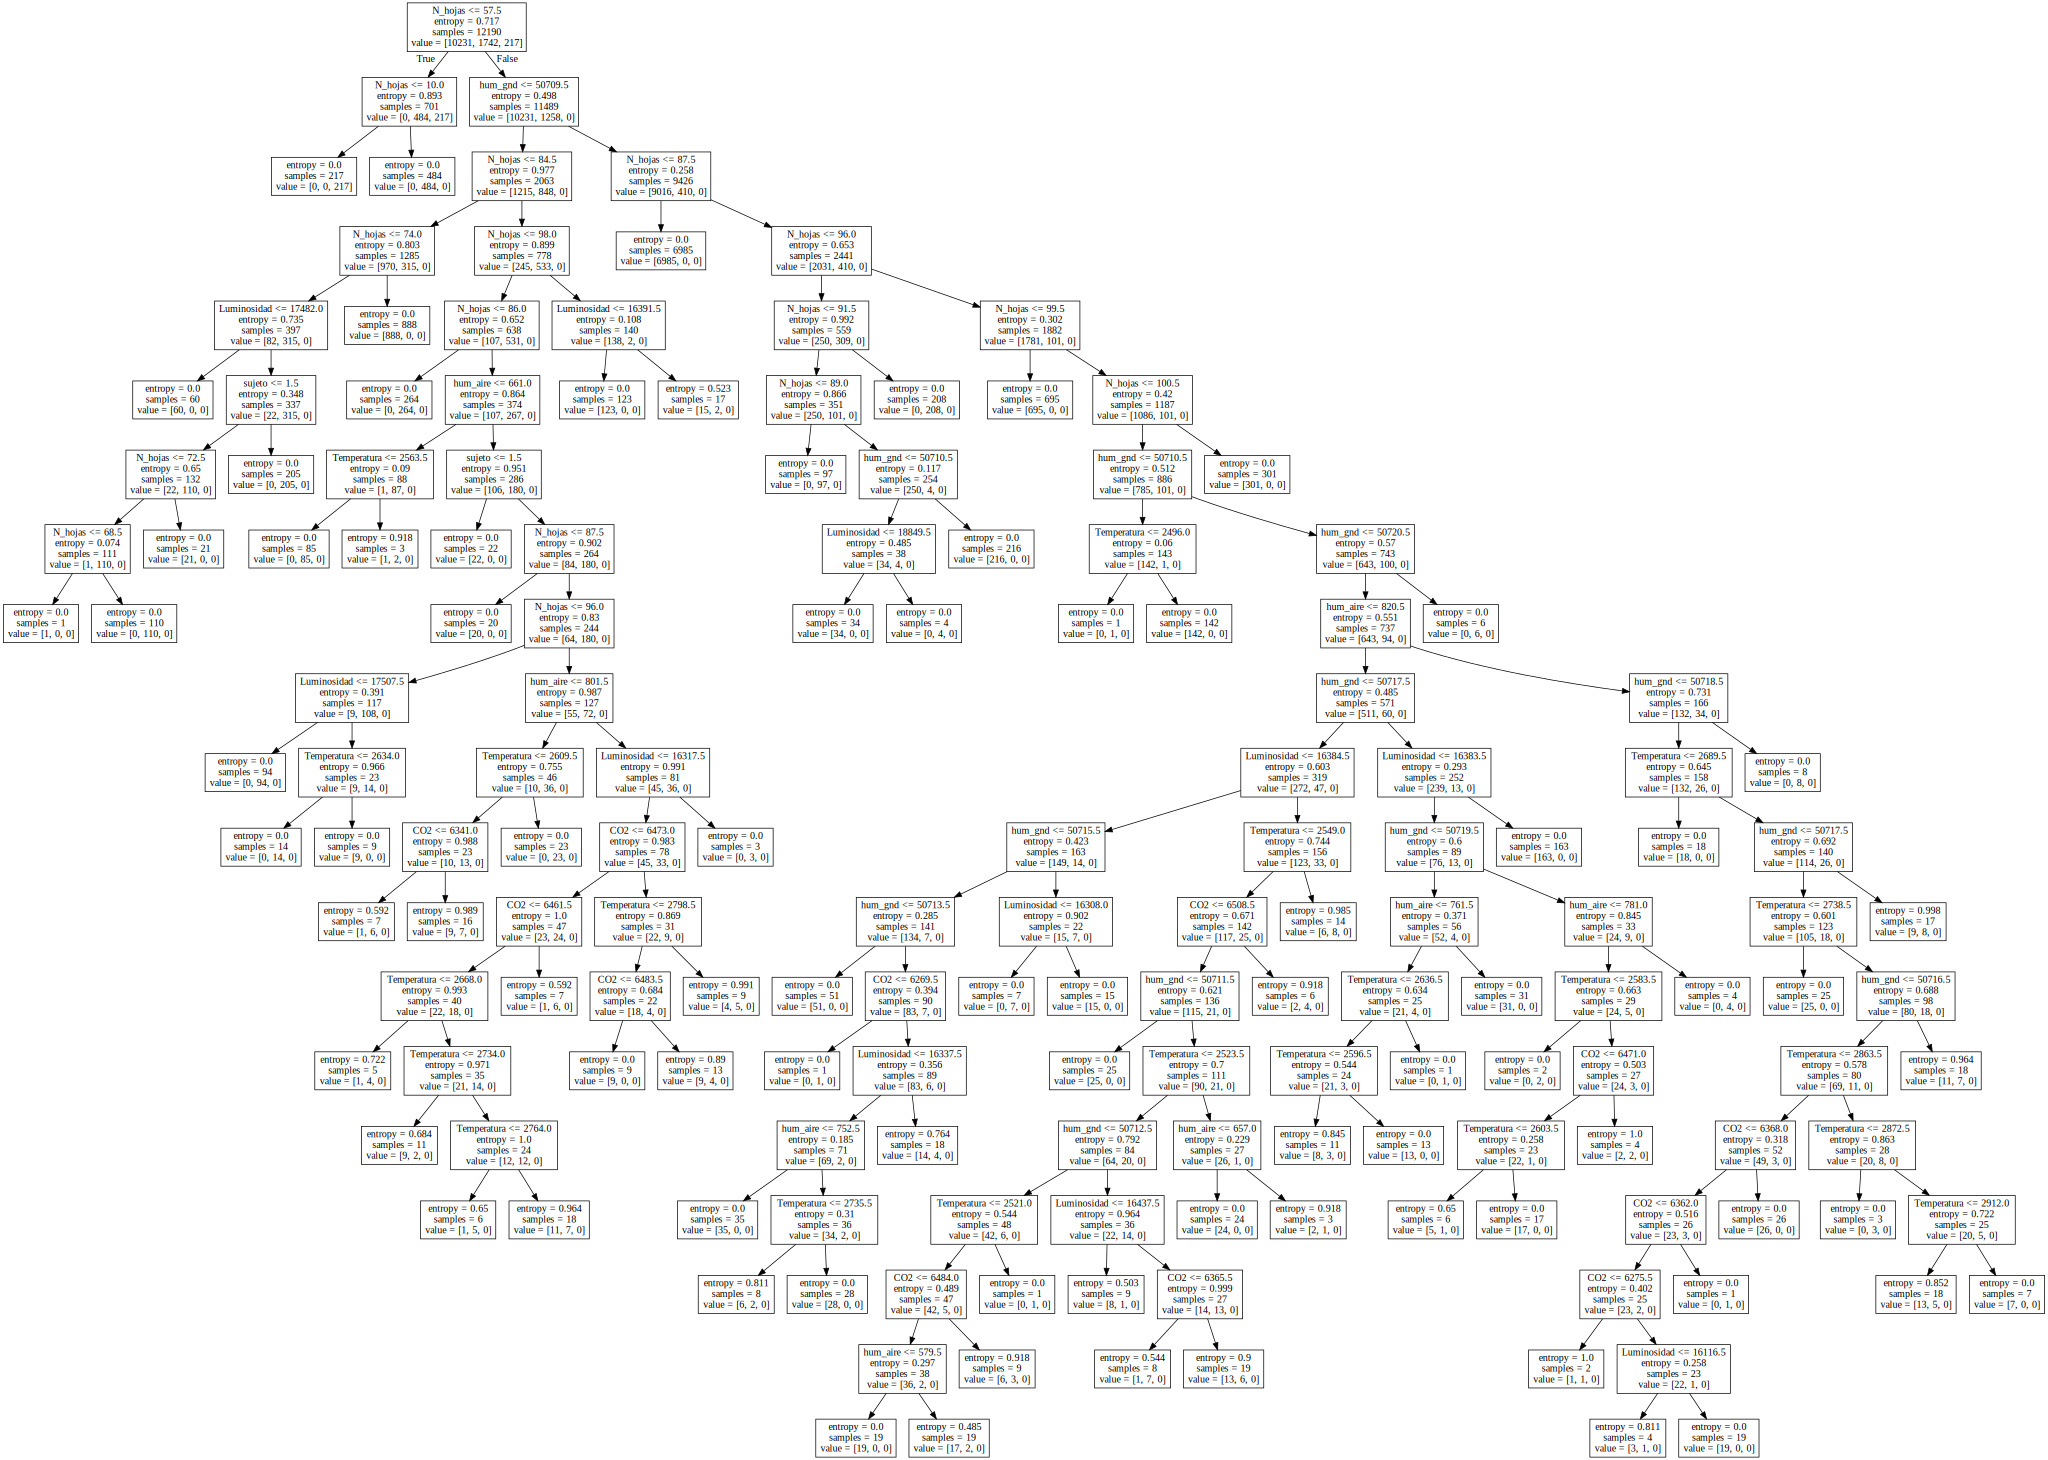

In [39]:
Source(texto_archivo)

## Poda del árbol de decisón

#### Para validar el árbol implemento Validación cruzada

In [40]:
X = data_nfecha[predictores]
Y = data_nfecha[target]

In [41]:
arbol = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=20, random_state=99)
arbol.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20,
                       random_state=99)

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [43]:
cv = KFold(n_splits= X.shape[0], shuffle=True, random_state=1)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
scores=cross_val_score(arbol, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
score = np.mean(scores)
score

0.9189239447096015

In [47]:
for i in range (1,11):
    arbol = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    arbol.fit(X,Y)
    cv = KFold(n_splits= X.shape[0], shuffle=True, random_state=1)
    scores=cross_val_score(arbol, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean((scores))
    print("Score para i: ",i," es de ", score)
    print("    ", arbol.feature_importances_)

Score para i:  1  es de  0.8775801152916383
     [0. 0. 0. 0. 0. 1. 0.]
Score para i:  2  es de  0.8958036323064527
     [0.         0.         0.         0.29171412 0.         0.70828588
 0.        ]
Score para i:  3  es de  0.9189239447096015
     [0.         0.         0.         0.23003848 0.         0.76996152
 0.        ]
Score para i:  4  es de  0.9549370854769726
     [0.         0.         0.         0.18078462 0.         0.81921538
 0.        ]
Score para i:  5  es de  0.9717969379532635
     [0.         0.         0.         0.16607089 0.02601424 0.80791487
 0.        ]
Score para i:  6  es de  0.9799169404326535
     [0.         0.         0.00613543 0.15762269 0.02469087 0.80765064
 0.00390038]
Score para i:  7  es de  0.9815905287299325
     [0.         0.         0.00622286 0.15880394 0.02424468 0.80252282
 0.0082057 ]
Score para i:  8  es de  0.9860534308560094
     [0.00217102 0.         0.00615419 0.1594163  0.02462951 0.79879091
 0.00883807]
Score para i:  9  es de  

In [48]:
predictores

['Temperatura',
 'CO2',
 'hum_aire',
 'hum_gnd',
 'Luminosidad',
 'N_hojas',
 'sujeto']

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True,n_estimators=500)
forest.fit(X,Y)

RandomForestClassifier(n_estimators=500, n_jobs=2, oob_score=True)

In [51]:
forest.oob_decision_function_

array([[0.99456522, 0.00543478, 0.        ],
       [0.98958333, 0.01041667, 0.        ],
       [1.        , 0.        , 0.        ],
       ...,
       [0.00518135, 0.98963731, 0.00518135],
       [0.        , 1.        , 0.        ],
       [0.00540541, 0.36216216, 0.63243243]])

In [52]:
forest.oob_score_ #valor de la precisión

0.9863633546147648

## Matriz de confusión

In [53]:
data_nfecha.shape

(16133, 9)